In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from wordcloud import WordCloud

In [60]:
!pip install networkx
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 3.5 MB/s eta 0:00:00a 0:00:01


In [3]:
df = pd.read_csv('Games_Dataset_cleaned.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Name,Genre,Category,Release_Date,Price (in $),Owners,Followers,Developers,Publishers
0,0,0,Tetris effect: connected,"Casual, Indie","Single-player, Multi-player, PvP, Online PvP,...",2021-08-17,39.99,"200,000 - 500,000","14,663",Stage Games,Enhance
1,1,1,Chicory: a colorful tale,"Indie, RPG","Single-player, Multi-player, Co-op, Shared/Sp...",2021-06-10,19.99,"100,000 - 200,000","10,504",A Shell in the Pit,Finji
2,2,2,Opus: echo of starsong - full bloom edition,"Adventure, Indie","Single-player, Steam Achievements, Full contr...",2021-08-31,24.99,"200,000 - 500,000","27,588",SIGONO INC.,SIGONO INC.


In [4]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df.head(3)

,Name,Genre,Category,Release_Date,Price (in $),Owners,Followers,Developers,Publishers
0,Tetris effect: connected,"Casual, Indie","Single-player, Multi-player, PvP, Online PvP,...",2021-08-17,39.99,"200,000 - 500,000","14,663",Stage Games,Enhance
1,Chicory: a colorful tale,"Indie, RPG","Single-player, Multi-player, Co-op, Shared/Sp...",2021-06-10,19.99,"100,000 - 200,000","10,504",A Shell in the Pit,Finji
2,Opus: echo of starsong - full bloom edition,"Adventure, Indie","Single-player, Steam Achievements, Full contr...",2021-08-31,24.99,"200,000 - 500,000","27,588",SIGONO INC.,SIGONO INC.


In [5]:
sns.set_palette("YlOrBr")

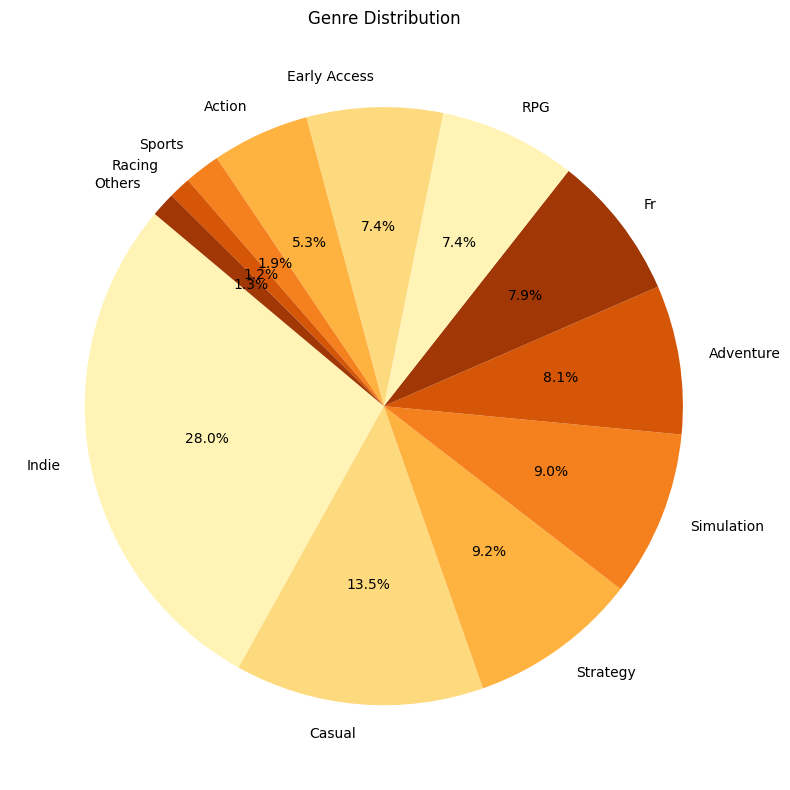

In [6]:
genres = df['Genre'].str.split(', ').explode()
genres = genres.replace({'in Early Access': 'Early Access'}).value_counts()

genre_percentages = genres / genres.sum() * 100
others_count = genres[genre_percentages < 1].sum()

genres_filtered = genres[genre_percentages >= 1]
genres_filtered['Others'] = others_count

plt.figure(figsize=(10, 8))
genres_filtered.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.tight_layout()
plt.show()

In [7]:
def categorize_game(row):
    categories = row['Category']
    if 'Single-player' in categories and ('Multi-player' in categories or 'Co-op' in categories):
        return 'Both'
    elif 'Single-player' in categories:
        return 'Single-player'
    elif 'Multi-player' in categories or 'Co-op' in categories:
        return 'Multi-player'
    return 'Other'

In [8]:
df['Game Type'] = df.apply(categorize_game, axis=1)

In [9]:
sns.set_palette("pastel")

In [10]:
df['Categories'] = df['Category'].str.split(',')
df_exploded = df.explode('Categories',ignore_index=True)
category_counts = df_exploded.groupby(['Game Type', 'Categories']).size()
top_5_categories = category_counts.groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Counts')


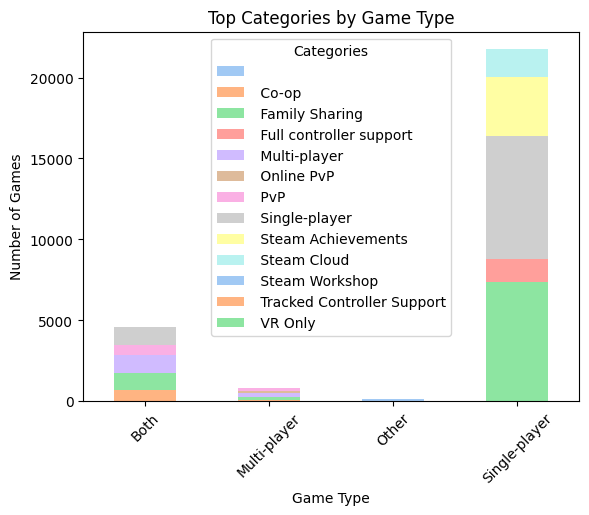

In [11]:
top_5_categories.pivot(index='Game Type', columns='Categories', values='Counts').plot(kind='bar', stacked=True)
plt.ylabel('Number of Games')
plt.title('Top Categories by Game Type')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()

In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df_2021 = df[df['Release_Date'].dt.year == 2021]
df_2021['Release_Month'] = df_2021['Release_Date'].dt.month
monthly_releases = df_2021.groupby('Release_Month').size()

/var/folders/8t/3j3yl_2s76g5gzxl2vc43hyh0000gn/T/ipykernel_6015/4104168916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Release_Month'] = df_2021['Release_Date'].dt.month


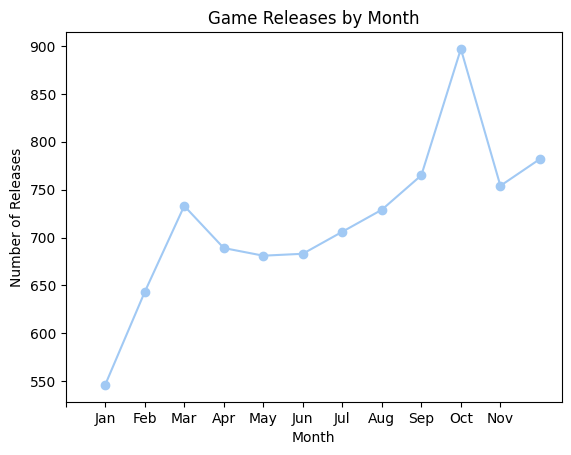

In [59]:
monthly_releases.plot(kind='line', marker='o')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Game Releases by Month')
plt.xticks(ticks=range(len(monthly_releases)), labels=months[:len(monthly_releases)], rotation=0)
plt.show()

In [14]:
df['Followers'] = df['Followers'].str.replace(',', '').astype(float)
top_20_games = df.sort_values(by='Followers', ascending=False).head(20)

In [15]:
top_20_games = top_20_games[['Name', 'Followers']]
top_20_games

,Name,Followers
487,Valheim,486385.0
4,It takes two,442068.0
485,Forza horizon 5,431759.0
183,New world,415684.0
484,Totally accurate battle simulator,380805.0
483,Battlefield 2042,331737.0
486,Forza horizon 4,317911.0
91,Hell let loose,316213.0
99,Gtfo,290279.0
71,Age of empires iv: anniversary edition,276384.0


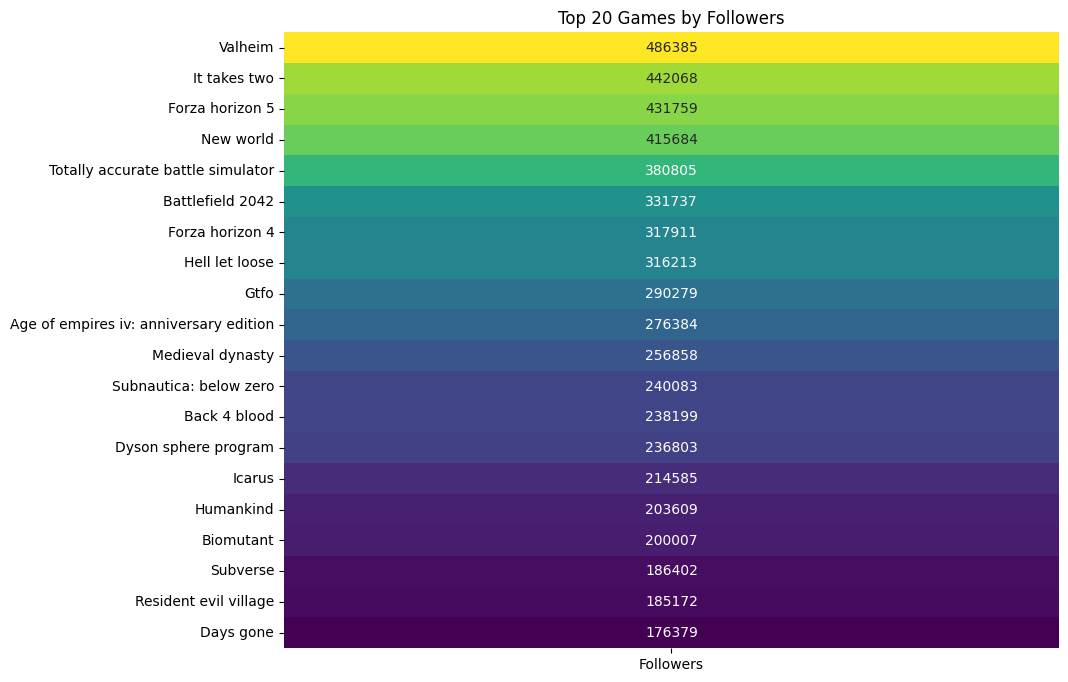

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(top_20_games[['Followers']],yticklabels=top_20_games['Name'], annot=True, cmap='viridis', cbar=False,fmt='g')
plt.title('Top 20 Games by Followers')
plt.show()

In [30]:
developer_counts = df['Developers'].value_counts()
publisher_counts = df['Publishers'].value_counts()

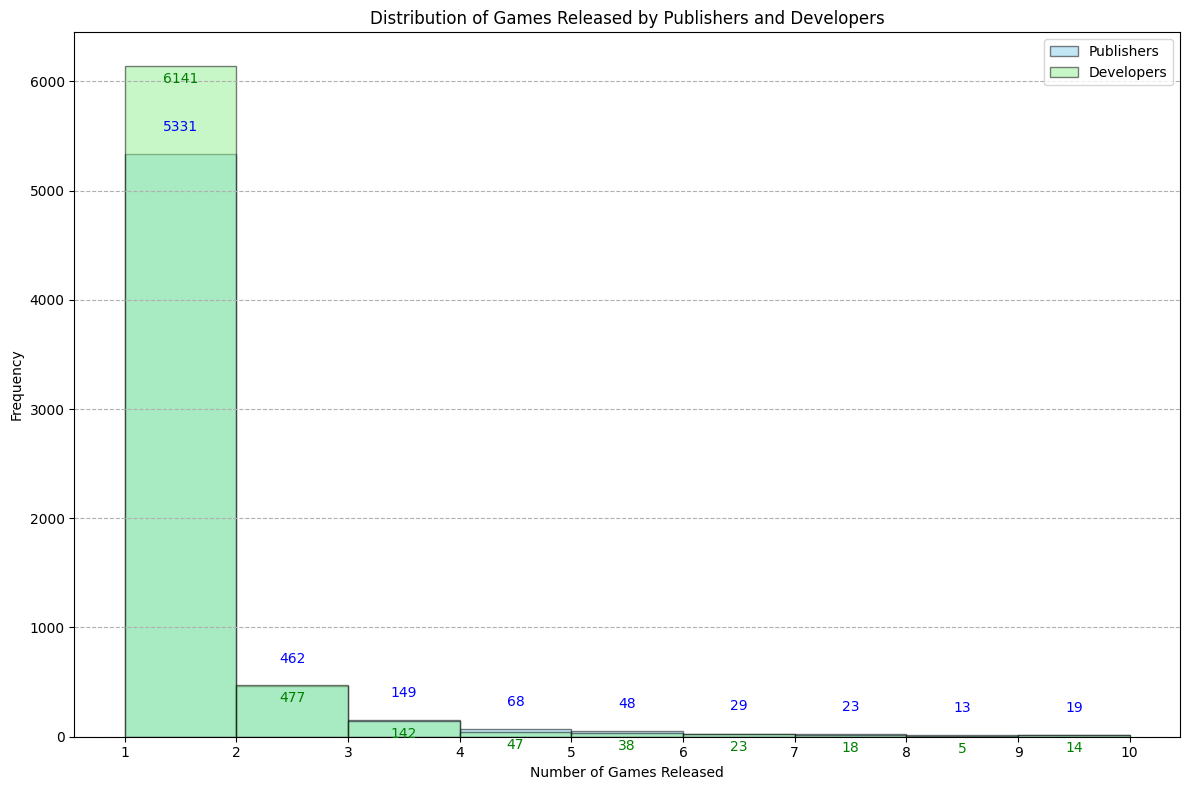

In [36]:
plt.figure(figsize=(12, 8))
pub_counts, pub_bins, _ = plt.hist(publisher_counts, bins=range(1, 11), alpha=0.5, label='Publishers', color='skyblue', edgecolor='black')
dev_counts, dev_bins, _ = plt.hist(developer_counts, bins=range(1, 11), alpha=0.5, label='Developers', color='lightgreen', edgecolor='black')
offset = max(pub_counts.max(), dev_counts.max()) * 0.03

for count, bin in zip(pub_counts, pub_bins):
    if count > 0:  # Only add text if the count is greater than 0
        plt.text(bin+0.5, count + offset, str(int(count)), ha='center', va='bottom', color='blue')

for count, bin in zip(dev_counts, dev_bins):
    if count > 0:  # Only add text if the count is greater than 0
        plt.text(bin+0.5, count - offset, str(int(count)), ha='center', va='bottom', color='green')

plt.title('Distribution of Games Released by Publishers and Developers')
plt.xlabel('Number of Games Released')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.legend()

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
top_developers = df.groupby('Developers')['Followers'].sum().sort_values(ascending=False).head(20)
top_publishers = df.groupby('Publishers')['Followers'].sum().sort_values(ascending=False).head(20)

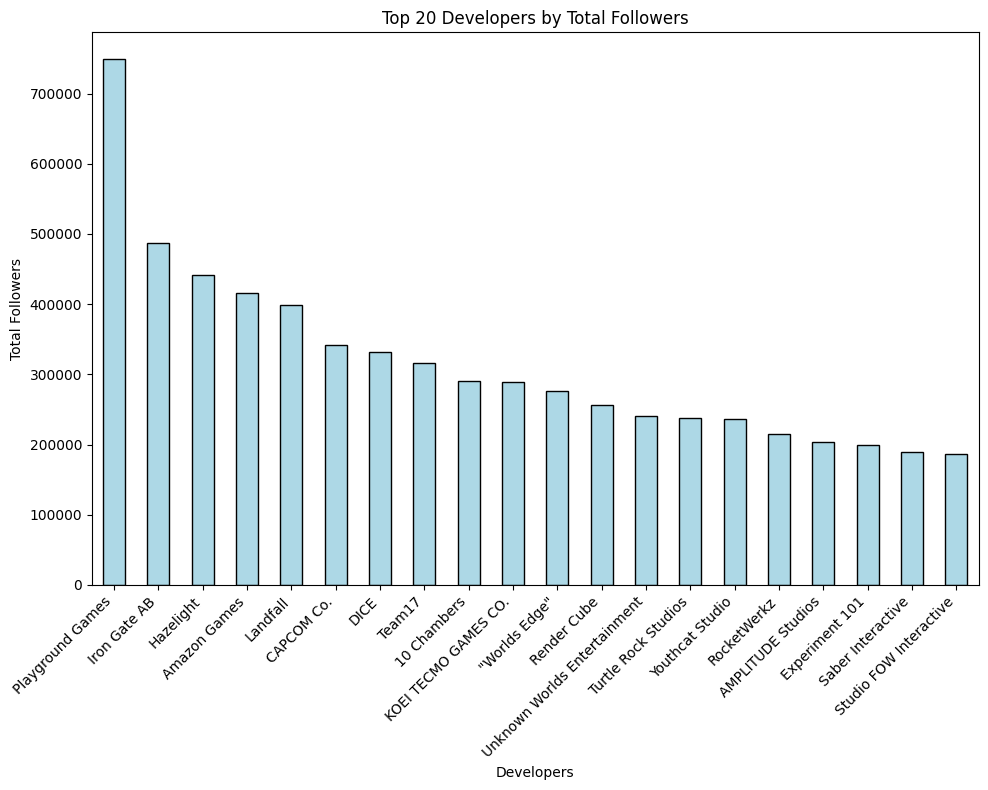

In [39]:
plt.figure(figsize=(10, 8))
top_developers.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 20 Developers by Total Followers')
plt.ylabel('Total Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

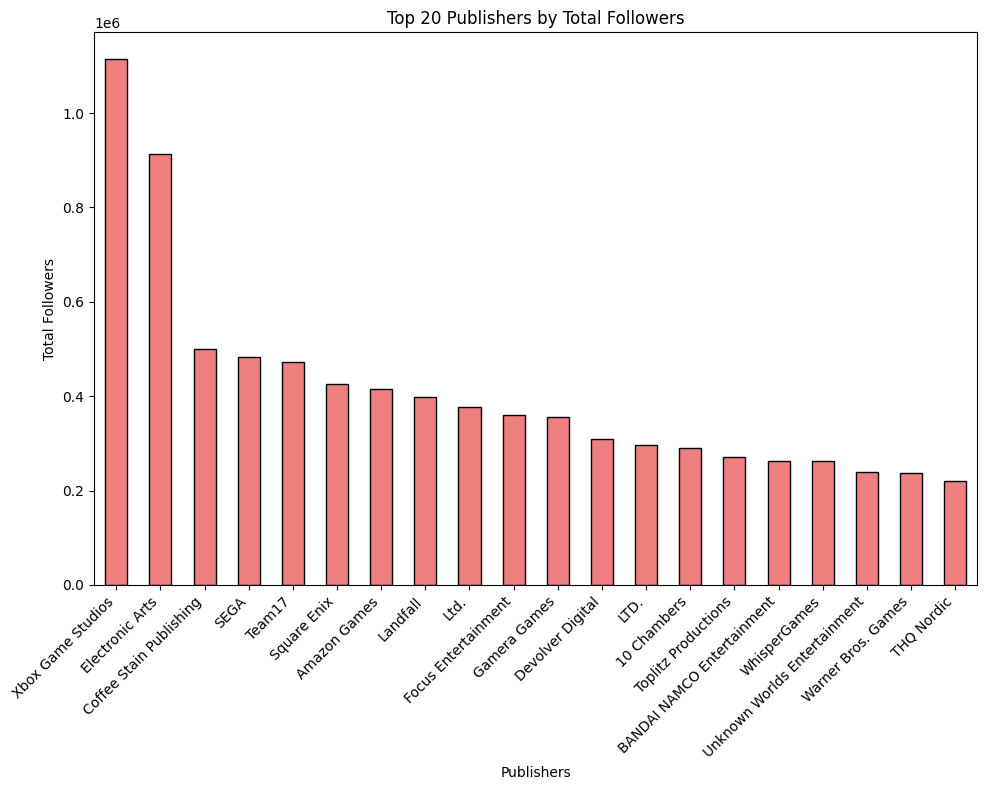

In [40]:
plt.figure(figsize=(10, 8))
top_publishers.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 20 Publishers by Total Followers')
plt.ylabel('Total Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
def calculate_midpoint(ownership_range):
    lower, upper = ownership_range.split(' - ')
    lower = int(lower.replace(',', ''))
    upper = int(upper.replace(',', ''))

    return (lower + upper) / 2

In [42]:
df['Ownership_Midpoint'] = df['Owners'].apply(calculate_midpoint)

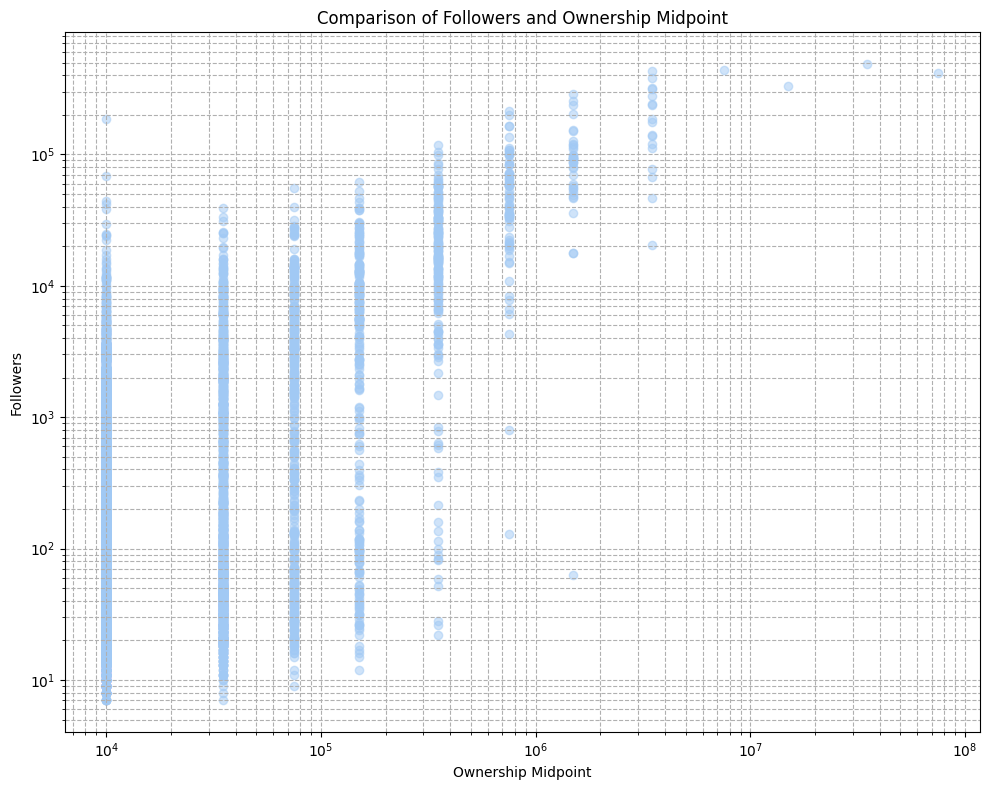

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Ownership_Midpoint'], df['Followers'], alpha=0.5)
plt.title('Comparison of Followers and Ownership Midpoint')
plt.xlabel('Ownership Midpoint')
plt.ylabel('Followers')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [51]:
df['Genre_List'] = df['Genre'].str.split(', ')
df['Category_List'] = df['Category'].str.split(', ')

genre_counts = Counter(np.concatenate(df['Genre_List'].values))
category_counts = Counter(np.concatenate(df['Category_List'].values))

genre_summary = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
category_summary = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)


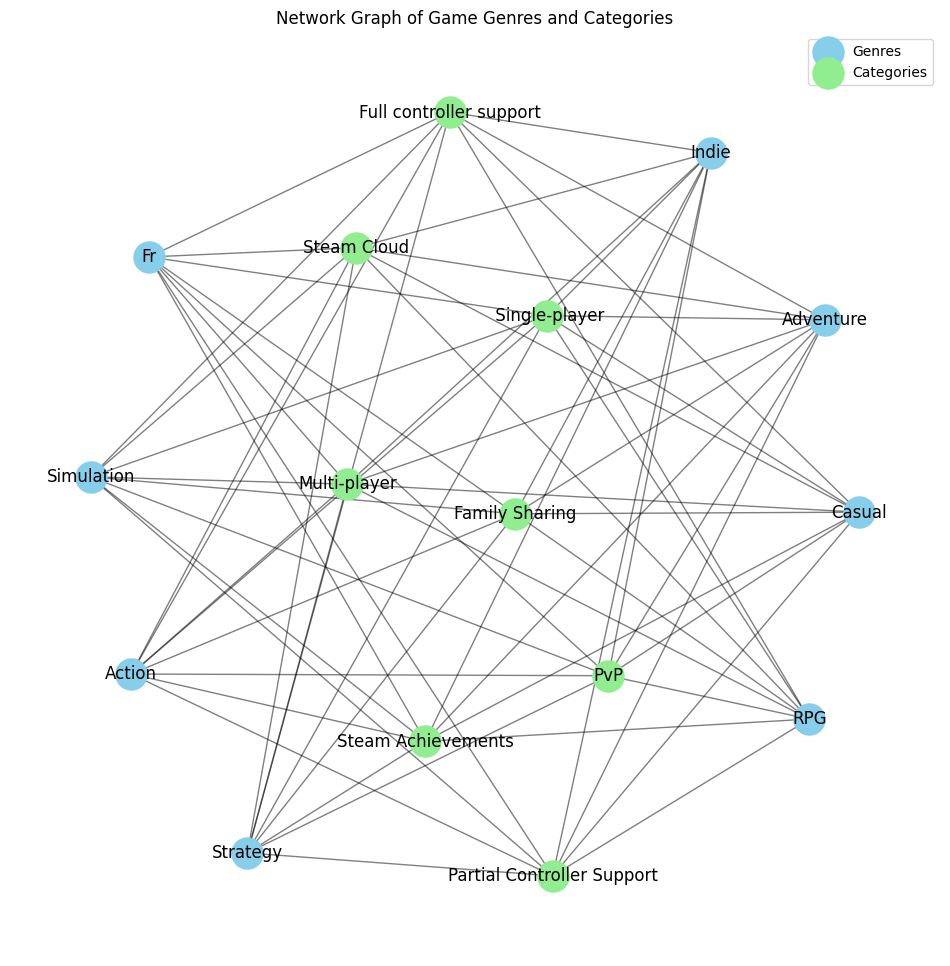

In [54]:
selected_genres = genre_summary['Genre'].head(8).tolist()
selected_categories = category_summary['Category'].head(8).tolist()

filtered_df = df[df['Genre_List'].apply(lambda x: any(item in x for item in selected_genres)) & df['Category_List'].apply(lambda x: any(item in x for item in selected_categories))]


G = nx.Graph()

for genre in selected_genres:
    G.add_node(genre, type='genre')
for category in selected_categories:
    G.add_node(category, type='category')

for _, row in filtered_df.iterrows():
    for genre in row['Genre_List']:
        for category in row['Category_List']:
            if genre in selected_genres and category in selected_categories:
                G.add_edge(genre, category)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, nodelist=selected_genres, node_color='skyblue', label='Genres', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=selected_categories, node_color='lightgreen', label='Categories', node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title('Network Graph of Game Genres and Categories')
plt.legend(markerscale=1.0)
plt.axis('off')
plt.show()

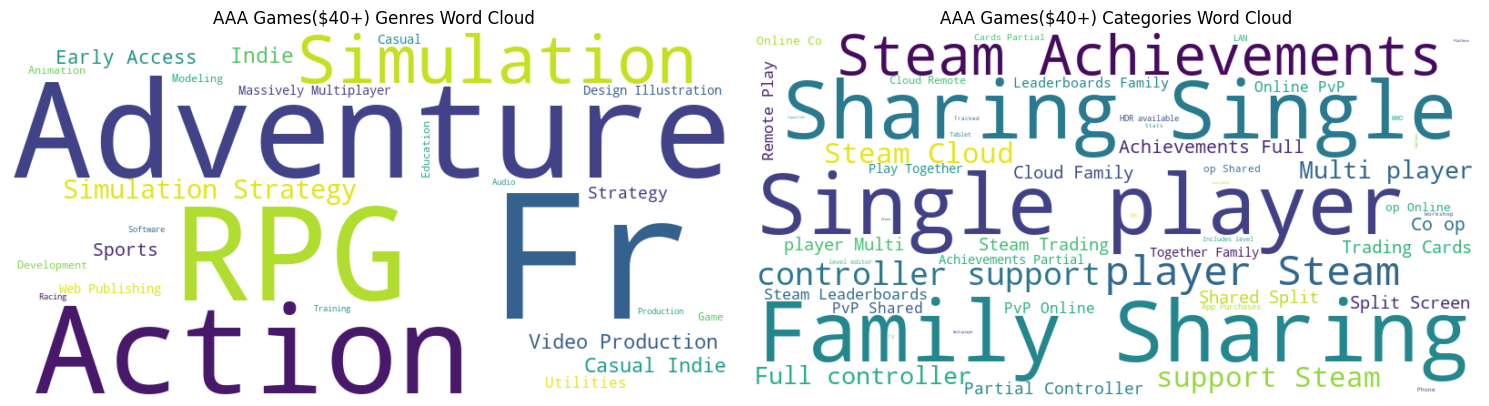

In [66]:
aaa_games = df[df['Price (in $)'] > 40]
aaa_genres_text = ' '.join(aaa_games['Genre'].str.replace(', ', ' '))
aaa_categories_text = ' '.join(aaa_games['Category'].str.replace(', ', ' ').str.replace('-', ' '))

aaa_genres_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(aaa_genres_text)
aaa_categories_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(aaa_categories_text)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(aaa_genres_wordcloud, interpolation='bilinear')
plt.title('AAA Games($40+) Genres Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aaa_categories_wordcloud, interpolation='bilinear')
plt.title('AAA Games($40+) Categories Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()